<a href="https://colab.research.google.com/github/lee-yeonseo/study-ml-dl-with-alone-book/blob/main/chapter_09_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from keras.datasets import imdb
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=500)
train_input, val_input, train_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2, random_state=42
)

In [3]:
from keras.preprocessing.sequence import pad_sequences

train_seq = pad_sequences(train_input, maxlen=100)
val_seq = pad_sequences(val_input, maxlen=100)

In [4]:
import keras

model_lstm = keras.Sequential()
model_lstm.add(keras.layers.Input(shape=(100,)))
model_lstm.add(keras.layers.Embedding(500, 16))
model_lstm.add(keras.layers.LSTM(8))
model_lstm.add(keras.layers.Dense(1, activation='sigmoid'))

In [5]:
model_lstm.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 100, 16)        │         8,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 8)              │           800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,809 (34.41 KB)

 Trainable params: 8,809 (34.41 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-lstm-model.keras',
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model_lstm.fit(train_seq, train_target, epochs=100, batch_size=64,
                         validation_data=(val_seq, val_target),
                         callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 33s 84ms/step - accuracy: 0.6293 - loss: 0.6391 - val_accuracy: 0.7628 - val_loss: 0.5056
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 36s 68ms/step - accuracy: 0.7885 - loss: 0.4656 - val_accuracy: 0.7852 - val_loss: 0.4786
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 43s 74ms/step - accuracy: 0.8099 - loss: 0.4256 - val_accuracy: 0.7924 - val_loss: 0.4435
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 39s 69ms/step - accuracy: 0.8115 - loss: 0.4154 - val_accuracy: 0.8026 - val_loss: 0.4272
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 37s 55ms/step - accuracy: 0.8190 - loss: 0.4013 - val_accuracy: 0.7984 - val_loss: 0.4339
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 31s 90ms/step - accuracy: 0.8132 - loss: 0.4080 - val_accuracy: 0.7842 - val_loss: 0.4531
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 32s 63ms/step - accuracy: 0.8121 - loss: 0.4089 - val_accuracy: 0.7926 - val_loss: 0.4398


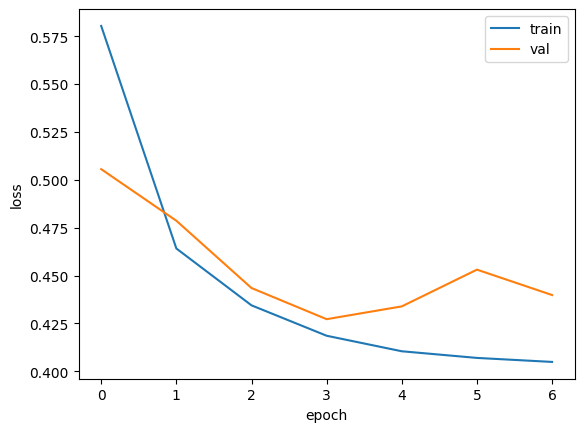

In [7]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

In [8]:
model_dropout = keras.Sequential()
model_dropout.add(keras.layers.Input(shape=(100,)))
model_dropout.add(keras.layers.Embedding(500, 16))
model_dropout.add(keras.layers.LSTM(8, dropout=0.2))
model_dropout.add(keras.layers.Dense(1, activation='sigmoid'))

In [9]:
model_dropout.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-dropout-model.keras',
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model_dropout.fit(train_seq, train_target, epochs=100, batch_size=64,
                            validation_data=(val_seq, val_target),
                            callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 29s 78ms/step - accuracy: 0.6172 - loss: 0.6531 - val_accuracy: 0.7692 - val_loss: 0.5193
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 41s 79ms/step - accuracy: 0.7772 - loss: 0.4931 - val_accuracy: 0.7736 - val_loss: 0.4811
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 41s 80ms/step - accuracy: 0.7858 - loss: 0.4622 - val_accuracy: 0.7774 - val_loss: 0.4702
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 37s 68ms/step - accuracy: 0.7971 - loss: 0.4428 - val_accuracy: 0.8004 - val_loss: 0.4365
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 16s 52ms/step - accuracy: 0.8078 - loss: 0.4257 - val_accuracy: 0.8036 - val_loss: 0.4278
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 16s 50ms/step - accuracy: 0.8085 - loss: 0.4145 - val_accuracy: 0.8062 - val_loss: 0.4346
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 49ms/step - accuracy: 0.8070 - loss: 0.4142 - val_accuracy: 0.8030 - val_loss: 0.4361
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 22s 54ms/step - accuracy: 0.8140 - loss: 0

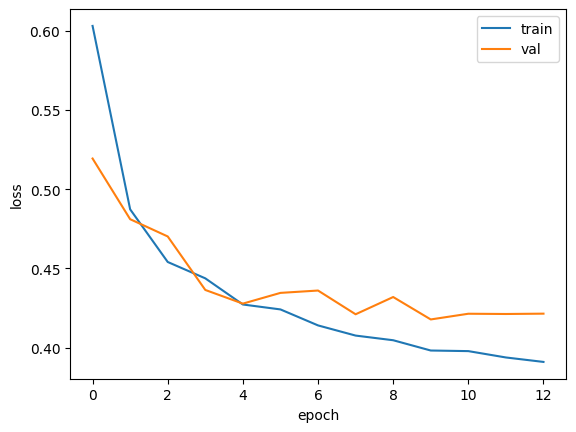

In [10]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

In [13]:
model_2lstm = keras.Sequential()
model_2lstm.add(keras.layers.Input(shape=(100,)))
model_2lstm.add(keras.layers.Embedding(500, 16))
model_2lstm.add(keras.layers.LSTM(8, dropout=0.2, return_sequences=True))
model_2lstm.add(keras.layers.LSTM(8, dropout=0.2))
model_2lstm.add(keras.layers.Dense(1, activation='sigmoid'))
model_2lstm.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ (None, 100, 16)        │         8,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 8)         │           800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 8)              │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,353 (36.54 KB)

 Trainable params: 9,353 (36.54 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
model_2lstm.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ (None, 100, 16)        │         8,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 8)         │           800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 8)              │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,353 (36.54 KB)

 Trainable params: 9,353 (36.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model_2lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-2lstm-model.keras',
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model_2lstm.fit(train_seq, train_target, epochs=100, batch_size=64,
                          validation_data=(val_seq, val_target),
                          callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 35s 95ms/step - accuracy: 0.5800 - loss: 0.6646 - val_accuracy: 0.7688 - val_loss: 0.4893
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 42s 97ms/step - accuracy: 0.7723 - loss: 0.4911 - val_accuracy: 0.7932 - val_loss: 0.4471
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 30s 96ms/step - accuracy: 0.7891 - loss: 0.4541 - val_accuracy: 0.7984 - val_loss: 0.4352
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 39s 91ms/step - accuracy: 0.7963 - loss: 0.4449 - val_accuracy: 0.8038 - val_loss: 0.4338
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 42s 92ms/step - accuracy: 0.8044 - loss: 0.4325 - val_accuracy: 0.8024 - val_loss: 0.4336
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 41s 91ms/step - accuracy: 0.8094 - loss: 0.4176 - val_accuracy: 0.8008 - val_loss: 0.4342
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 41s 92ms/step - accuracy: 0.8103 - loss: 0.4208 - val_accuracy: 0.8108 - val_loss: 0.4201
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 41s 93ms/step - accuracy: 0.8156 - loss: 0

In [ ]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
model_gru = keras.Sequential()
model_gru.add(keras.layers.Input(shape=(100,)))
model_gru.add(keras.layers.Embedding(500, 16))
model_gru.add(keras.layers.GRU(8, dropout=0.2))
model_gru.add(keras.layers.Dense(1, activation='sigmoid'))

In [ ]:
model_gru.summary()

In [ ]:
model_gru.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-gru-model.keras',
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model_gru.fit(train_seq, train_target, epochs=100, batch_size=64,
                        validation_data=(val_seq, val_target),
                        callbacks=[checkpoint_cb, early_stopping_cb])

In [ ]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()